<a href="https://colab.research.google.com/github/Klrojasm/DPS/blob/main/tarea_2_PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

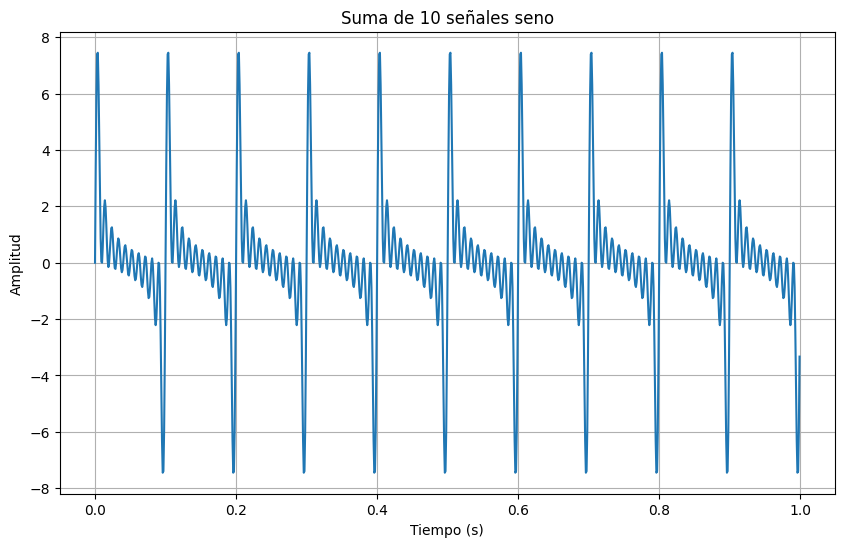

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 1000  # Frecuencia de muestreo
duration = 1  # Duración de la señal
t = np.arange(0, duration, 1/fs)  # Vector de tiempo
num_signals = 11

# Inicializar la suma de señales
sum_signal = np.zeros_like(t)

# Crear y sumar las señales seno
for i in range(num_signals):
    frequency = i * 10  # Frecuencia de la señal i-ésima
    amplitude = 1  # Amplitud de la señal i-ésima
    signal = amplitude * np.sin(2 * np.pi * frequency * t)
    sum_signal += signal


# Graficar la señal suma
plt.figure(figsize=(10, 6))
plt.plot(t, sum_signal)
plt.title('Suma de 10 señales seno')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

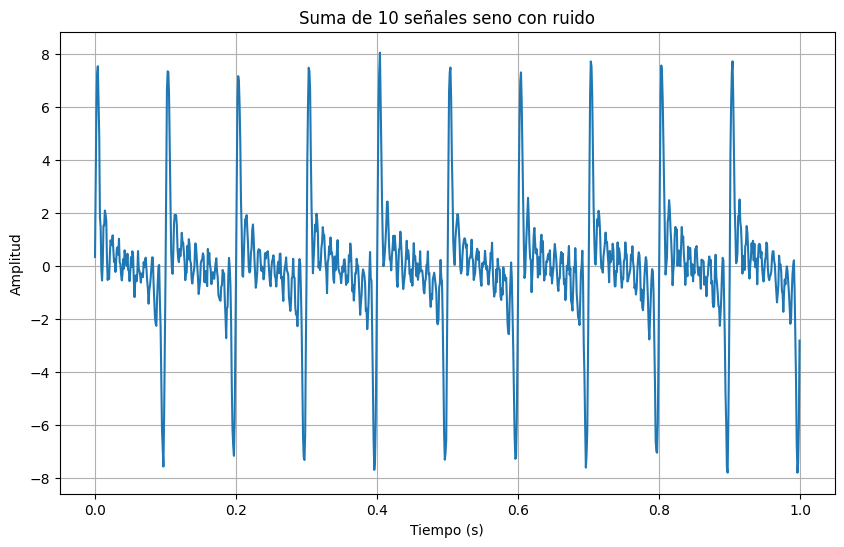

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Agregar ruido blanco gaussiano
noise = 0.3 * np.random.normal(0, 1, len(sum_signal))
sum_signal += noise

# Graficar la señal suma con ruido
plt.figure(figsize=(10, 6))
plt.plot(t, sum_signal)
plt.title('Suma de 10 señales seno con ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

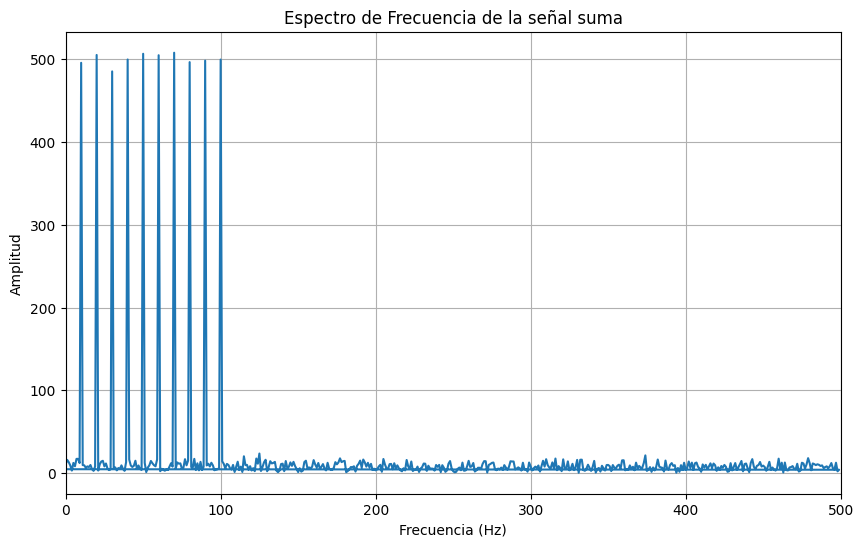

In [10]:
# Calcular la FFT de la señal suma
w = np.fft.fft(sum_signal)

# Calcular las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(sum_signal), 1/fs)

# Graficar el espectro de frecuencia
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(w))
plt.title('Espectro de Frecuencia de la señal suma')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, fs/2) # Mostrar solo la parte positiva del espectro
plt.grid(True)
plt.show()

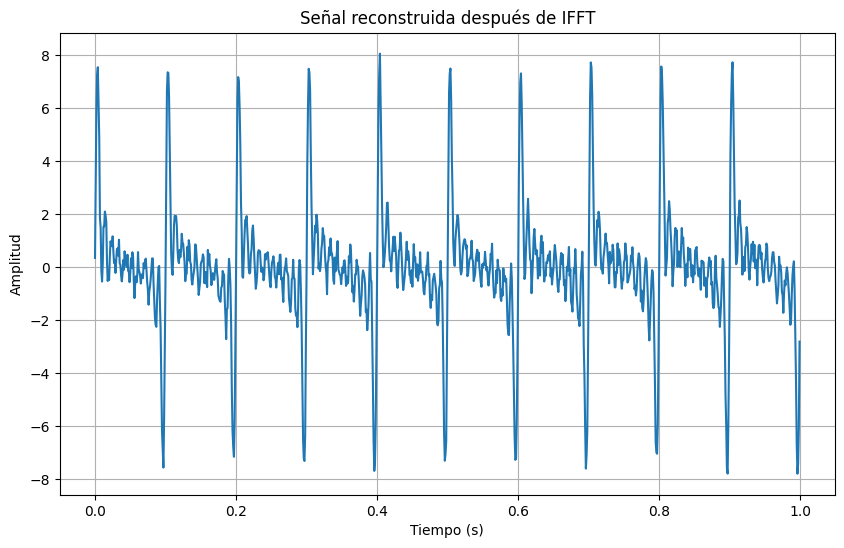

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular la IFFT de W
ifft_signal = np.fft.ifft(w)

# Graficar la señal reconstruida
plt.figure(figsize=(10, 6))
plt.plot(t, ifft_signal.real) # .real para obtener la parte real
plt.title('Señal reconstruida después de IFFT')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

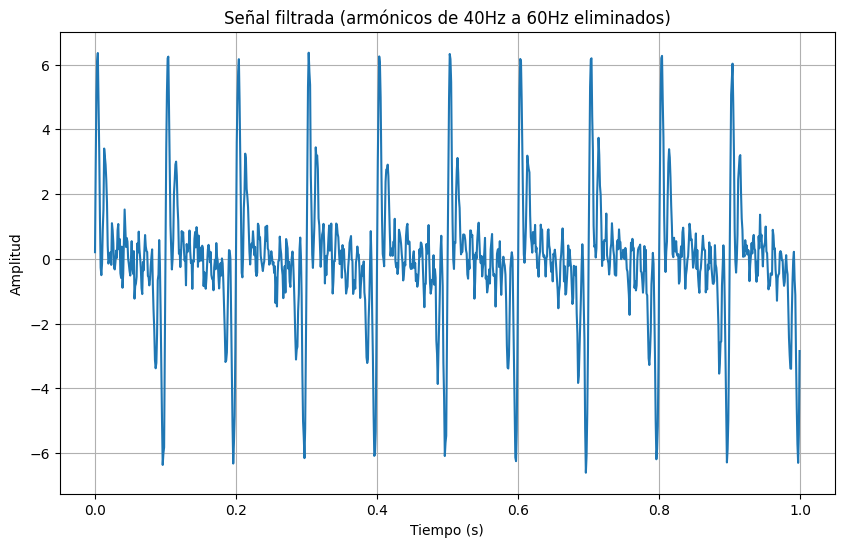

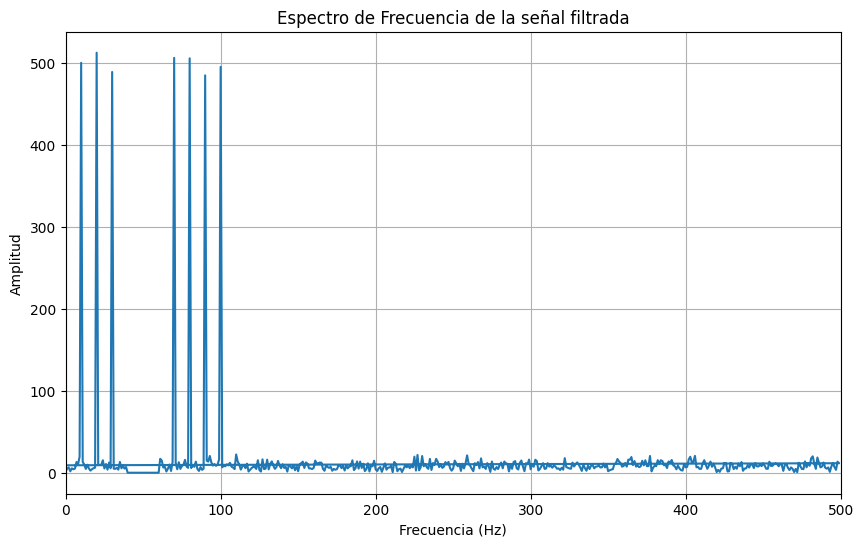

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 1000  # Frecuencia de muestreo
duration = 1  # Duración de la señal
t = np.arange(0, duration, 1/fs)  # Vector de tiempo
num_signals = 11

# Inicializar la suma de señales
sum_signal = np.zeros_like(t)

# Crear y sumar las señales seno
for i in range(num_signals):
    frequency = i * 10  # Frecuencia de la señal i-ésima
    amplitude = 1  # Amplitud de la señal i-ésima
    signal = amplitude * np.sin(2 * np.pi * frequency * t)
    sum_signal += signal

# Agregar ruido blanco gaussiano
noise = 0.3 * np.random.normal(0, 1, len(sum_signal))
sum_signal += noise

# Calcular la FFT de la señal suma
w = np.fft.fft(sum_signal)

# Calcular las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(sum_signal), 1/fs)

# Encontrar los índices de las frecuencias a eliminar
indices_to_remove = np.where((frequencies >= 40) & (frequencies <= 60))

# Eliminar los armónicos en el espectro de frecuencias
w[indices_to_remove] = 0

# Calcular la IFFT de la señal modificada
filtered_signal = np.fft.ifft(w)

# Graficar la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(t, filtered_signal.real)
plt.title('Señal filtrada (armónicos de 40Hz a 60Hz eliminados)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Graficar el espectro de frecuencia de la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(w))
plt.title('Espectro de Frecuencia de la señal filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, fs/2)
plt.grid(True)
plt.show()

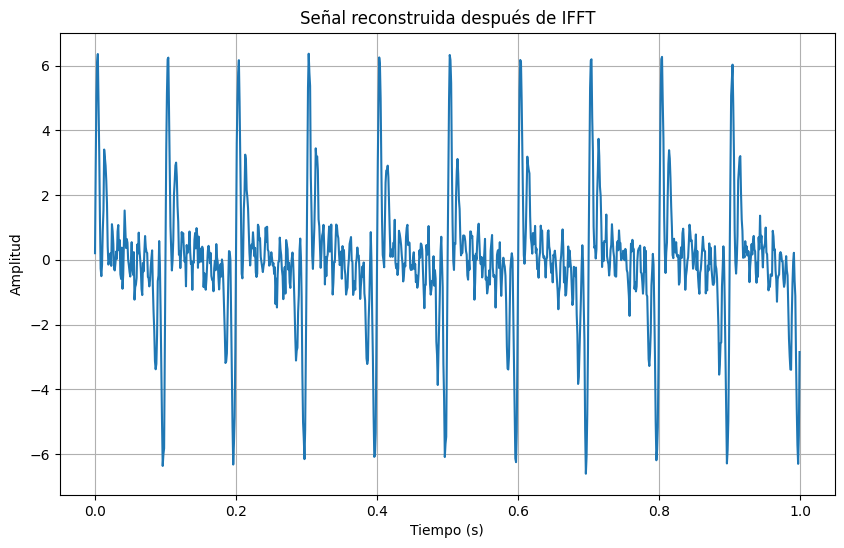

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular la IFFT de W
ifft_signal = np.fft.ifft(w)

# Graficar la señal reconstruida
plt.figure(figsize=(10, 6))
plt.plot(t, ifft_signal.real) # .real para obtener la parte real
plt.title('Señal reconstruida después de IFFT')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()